<a href="https://colab.research.google.com/github/joebathelt/AUC_CogPsy/blob/main/week4_attentional_blink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attentional Blink
Cognitive mechanisms can handle only limited amounts of information. In many situations, stimuli and mental events exceed the resources available for processing, meaning some information is attended to while the rest is lost. The precise limits of working memory remain debated, but there is broad consensus that it is constrained in both capacity and duration.

The attentional blink demonstrates one striking consequence of these limits: for a brief period after encoding a stimulus into working memory, attention cannot be directed to a new stimulus. The term "attentional blink" draws an analogy to the visual disruption during an eye blink — just as you momentarily cannot see while blinking, your attentional system momentarily cannot select new information while consolidating what it has just captured.
In the experiment, letters are presented in rapid succession at the same screen location, with each letter replacing the one before it. Your task is to watch the full sequence and then report whether certain target letters appeared. The sequences are carefully designed so that the temporal separation between two target letters varies systematically. For example, if the targets are J and K, the sequence ". . . JXTK . . ." places K three positions after J, while ". . . JXRBTK . . ." places it five positions after.

The key finding is that identification of the second target drops sharply when it appears soon after the first, then recovers as the separation increases. This pattern suggests that detecting the first target triggers an attentional process — consolidating that item into working memory — that temporarily prevents new targets from being selected. By measuring how recognition of the second target changes as a function of temporal separation, we can estimate how long this consolidation process takes and, by extension, how quickly attention can be released and redirected.

In [ ]:
# This cell load the data. You don't need to change it or understand it. Just run the cell.
import pandas as pd

file_id = '1b13EGBIvFv8BVxRcqI6QbvowEqZQJxQo'
url = f'https://docs.google.com/uc?export=download&id={file_id}'
df = pd.read_csv(url)

df.head()

,username,T1_1,T1_3,T1_7,T2_1,T2_3,T2_7,T1only
0,C1,0.2,0.5,0.4,0.8,0.2,0.6,0.47
1,C10,0.8,0.8,0.8,0.7,0.9,1.0,0.80
2,C11,0.8,0.9,0.9,0.8,0.8,1.0,0.80
3,C12,0.5,0.4,0.5,0.6,0.5,0.6,0.40
4,C13,0.6,0.5,0.6,0.7,0.3,0.2,0.47


**Insight**: The _1, _3, and _7 refer to the lag, the temporal distance between the J and the K. Knowing what you have learned about the attentional blink, why do you think the experiment assessed lag 1, 3, and 7?

**Insight:** In the experiment a trial could have only a J, only a K, both, or neither. However, the data table is calculated only on trials that contained both a J (Target 1) and a K (Target 2). Why do you think this is? Hint: An exception is the column ‘T1only’, which is based on trials with T1 but without T2.

**Your Turn**: Calculate the average accuracy per participant, excluding T1only trials and T2 trials.

In [ ]:
T1_average = df[['T1_1', 'T1_3', ...]].mean(axis=1) # Replace ... with the relevant columns
df['T1average'] = T1_average
df.head()

,username,T1_1,T1_3,T1_7,T2_1,T2_3,T2_7,T1only,T1average
0,C1,0.2,0.5,0.4,0.8,0.2,0.6,0.47,0.366667
1,C10,0.8,0.8,0.8,0.7,0.9,1.0,0.80,0.800000
2,C11,0.8,0.9,0.9,0.8,0.8,1.0,0.80,0.866667
3,C12,0.5,0.4,0.5,0.6,0.5,0.6,0.40,0.466667
4,C13,0.6,0.5,0.6,0.7,0.3,0.2,0.47,0.566667


**Your Turn**: Calculate the average for each column across participants.

In [ ]:
averages_df = df[[column for column in df.columns if not column == 'username']].mean(axis=?) # Replace ? with the relevant axis
print(averages_df)

T1_1         0.607692
T1_3         0.692308
T1_7         0.638462
T2_1         0.692308
T2_3         0.523077
T2_7         0.646154
T1only       0.672308
T1average    0.646154
dtype: float64


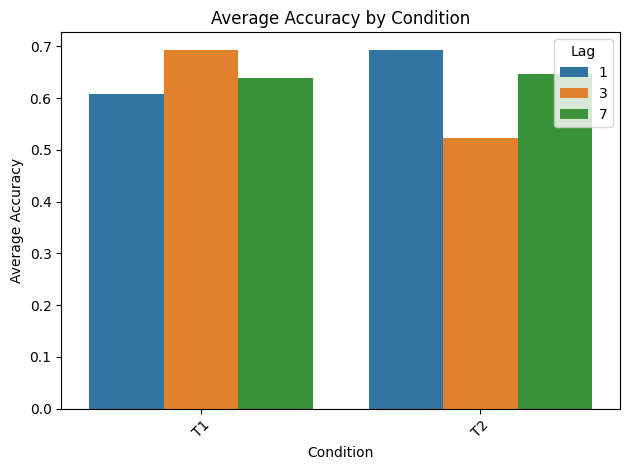

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reformat the averages_df to have columns for Condition, Lag, and Average Accuracy
averages_df = averages_df[[column for column in averages_df.index if column.startswith('T1_') or column.startswith('T2_')]]
conditions = [averages_df.index[i].split('_')[0] for i in range(len(averages_df))]
lags = [averages_df.index[i].split('_')[1] for i in range(len(averages_df))]
averages_df = pd.DataFrame({'Condition': conditions, 'Lag': lags, 'Average Accuracy': averages_df.values})

# Create a bar plot using seaborn
sns.barplot(x='Condition', y='Average Accuracy', hue='Lag', data=averages_df)
plt.xlabel('Condition')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy by Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Your Turn**: For each lag (1, 3, and 7) do a t-test to examine whether T2 accuracy is lower than T1 accuracy.

In [ ]:
from scipy.stats import ttest_rel

for lag in [1, ...]: # Replace ... with the relevant lags
    print(f'Performing paired t-test for lag {lag}...')
    condition1 = df[[f'T1_{lag}']].values
    condition2 = df[[f'T2_{lag}']].values

    t_statistic, p_value = ttest_rel(condition1, condition2)
    print(f'Lag {lag} - T-statistic: %.2f, P-value: %.3f' % (t_statistic[0], p_value[0]))
    print('\n')

Performing paired t-test for lag 1...
Lag 1 - T-statistic: -1.07, P-value: 0.306


Performing paired t-test for lag 3...
Lag 3 - T-statistic: 3.09, P-value: 0.009


Performing paired t-test for lag 7...
Lag 7 - T-statistic: -0.13, P-value: 0.899




**Insight**: Do the data provide evidence for an attentional blink? Do the data provide evidence for lag-1 sparing?

**Insight**: What would the data look like for a participant that responded ‘both’ on every single trial? Is this a problem?

**Your Turn**: Is T1 accuracy impaired when T2 is presented? Think about this question and then do a t-test to find out.

In [ ]:
# Hint: Use the T1only column



### Reflection Questions

- Was this experiment different from the standard attentional blink experiment (e.g. find the two numbers among a sequence of letters)? What is the key difference? Hint: think about the kind of response a participant needs to make.
- Here, we only analyzed trials that contained both T1 and T2. This means that many of the trials were not used in our analysis. In a standard attentional blink experiment, would we also have to discard so many trials?
- What is the benefit from the JK-version of the attentional blink experiment?
- What can we say about the duration of the attentional blink?
- Why was T1 accuracy not impaired when T2 was presented?


**Well done! Your reached the end of this notebook**

That's it for the Attentional Blink experiment! You should now have a good understanding of how to analyse data with different conditions, creating summary statistics for those conditions and comparing them with t-tests. In the next notebook, we will look at Visual Masking and Bayesian statistics.